<a href="https://colab.research.google.com/github/AngelGParra/Integracion-y-prospeccion-de-datos/blob/main/Muestreo_de_variables_aleatorias_Montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Se procede con la carga de las librerías

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Para conectar directamente con el drive
from google.colab import drive
drive.mount('/content/drive')

#La librería para los números aleatorios
import random as rnd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Se procede con la carga del archivo de trabajo
**Descripción de las variables**
Esta base de datos de eventos de pérdidas posee dos variables:
1. Frecuencia: Indica el número de eventos de pérdida por período de tiempo (semana, día, mes)
2. Severidad: indica el costo de cada devento de pérdida


Las pérdidas esperadas son:
 9.45111269614836
Las no pérdidas esperadas son:
 4.85836049807418
El valor de la póliza de aseguramiento:
 0.2656083


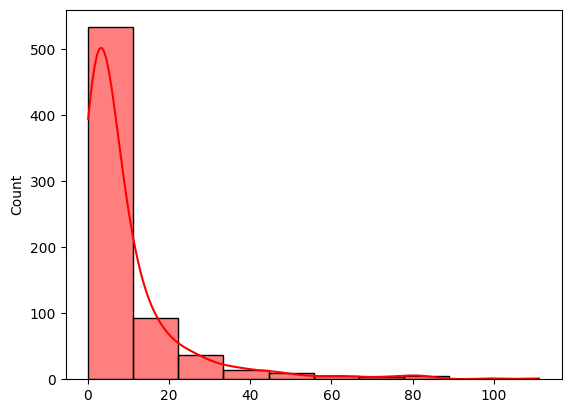

In [21]:
nxl='/content/drive/MyDrive/Octavo semestre/Integración de Datos y Prospección/Semana 3 /3. FallasTecnologicas en clase.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB.head(100)


Xf=XDB.iloc[:,3]
Xs=XDB.iloc[:,4]
LDA= Xf*Xs

u=np.mean(LDA) #Límite superior de perdidas esperadas
OpVar=np.percentile(LDA,0.999) #Valor Asegurado OpVar (Zona 3)
PNE=(u+OpVar)/2 #Perdidas esperadas (Zona 2)

print("Las pérdidas esperadas son:\n", u)
print("Las no pérdidas esperadas son:\n", PNE)
print("El valor de la póliza de aseguramiento:\n", OpVar)

plt.figure()
sns.histplot(LDA, bins=10, kde = True, color = 'red')
plt.show()


In [24]:
counts,bin_edges= np.histogram(LDA, bins=10)
LI=bin_edges[:-1]      #Límite inferiores
LS=bin_edges[1:]       #Límite inferiores
mc= (LI+LS)/2          #Punto medio

pdf=counts/sum(counts) #Nos entrega la frecuencia relativa
                       #Porcentaje de datos por intervalo
cdf=np.cumsum(pdf)     #Construimos la ruleta
                       #El acumulado de las probabilidades

df=pd.DataFrame(np.column_stack((LI,LS,mc,pdf,cdf)))
df.columns=['LI','LS','mc','pdf','cdf']
df.head(10)



,LI,LS,mc,pdf,cdf
0,0.14230,11.23637,5.689335,0.760342,0.760342
1,11.23637,22.33044,16.783405,0.132668,0.893010
2,22.33044,33.42451,27.877475,0.052782,0.945792
3,33.42451,44.51858,38.971545,0.019971,0.965763
4,44.51858,55.61265,50.065615,0.012839,0.978602
5,55.61265,66.70672,61.159685,0.007133,0.985735
6,66.70672,77.80079,72.253755,0.004280,0.990014
7,77.80079,88.89486,83.347825,0.007133,0.997147
8,88.89486,99.98893,94.441895,0.001427,0.998573
9,99.98893,111.08300,105.535965,0.001427,1.000000


3. Se procede con el muestreo de la variable a una confiabilidad del 99%

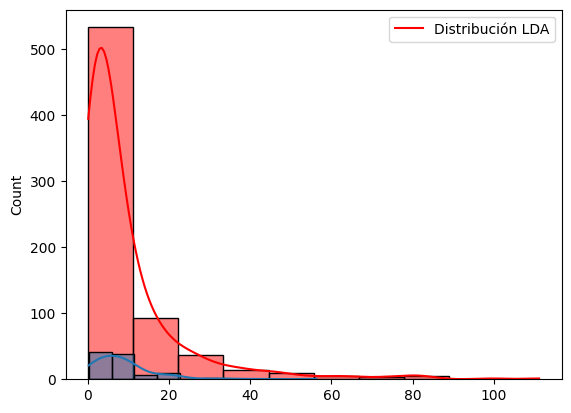

In [67]:
TI=LS[0]-LI[0]

#Confiabilidad
LDAm=np.zeros((100,1))

for i in range(100):
  aleatorio=rnd.random()
  print("El aleatorio:",aleatorio)

  print("La lista de números es:\n",cdf)
  print((aleatorio<cdf))


  Intervalo=np.array(np.where(aleatorio<cdf))
  print("El intervalo de trabajo es:\n",Intervalo[0,0])

  print("Los límites inferiores son:",LI)
  aleatorio2=rnd.random()
  print("El intervalo seleccionado es:\n",LI[Intervalo[0,0]])

  LDAm[i]=LI[Intervalo[0,0]]+TI*aleatorio2
  print("El valor muestreado es:\n",LDAm[1])

plt.figure()
sns.histplot(LDA, bins=10, kde = True, color = 'red')
plt.legend(['Disitribución LDA'])
sns.histplot(LDAm, bins=10, kde = True, color = 'blue')
plt.legend(['Distribución LDA'])
plt.show()






Analisis de resultado
La base de datos utilizada para este estudio posee un total de 701 datos de ventos de tiesgo semanales en transacciones fallidas en una entidad de fintech(Macro). Los datos presentaron una media tal, una desviación tal, así como un coeficiente de asimetría tal, y coeficiente de curtosis tal(Macro).

 Luego del muestreo a tres confiabilidades del 99% (100), 99,9% (1000), 99,99% (1000), los valores de asimtería encontrados para cada confiabilidad fueron: cas100, cas1000,cas10000, muy similares o fueron muy diferentes a los valores originales, cual coeficiente de asimetría fue más parecido a los datos originales, esto mismo se debe hacer para el coeficiente de curtosis. Tanto muestreados responden de acuerdo con su coeficiente de asimetría y su coeficeinte de curtosis a distribuciones tales y tales. Es importante mencionar que si los coeficientes de asimetría fueron posititvos, esto es indicador de pérdidas esperadas mucho más altas, y pérdidas catastróficas mucho menores (OpVar)